In [11]:
import pinocchio as pin
import numpy as np

In [21]:
model = pin.buildModelFromMJCF("mjcf/h1_ball_hands.xml", pin.JointModelFreeFlyer())
data = model.createData()

In [41]:
model.names[0]  # 'world'

'universe'

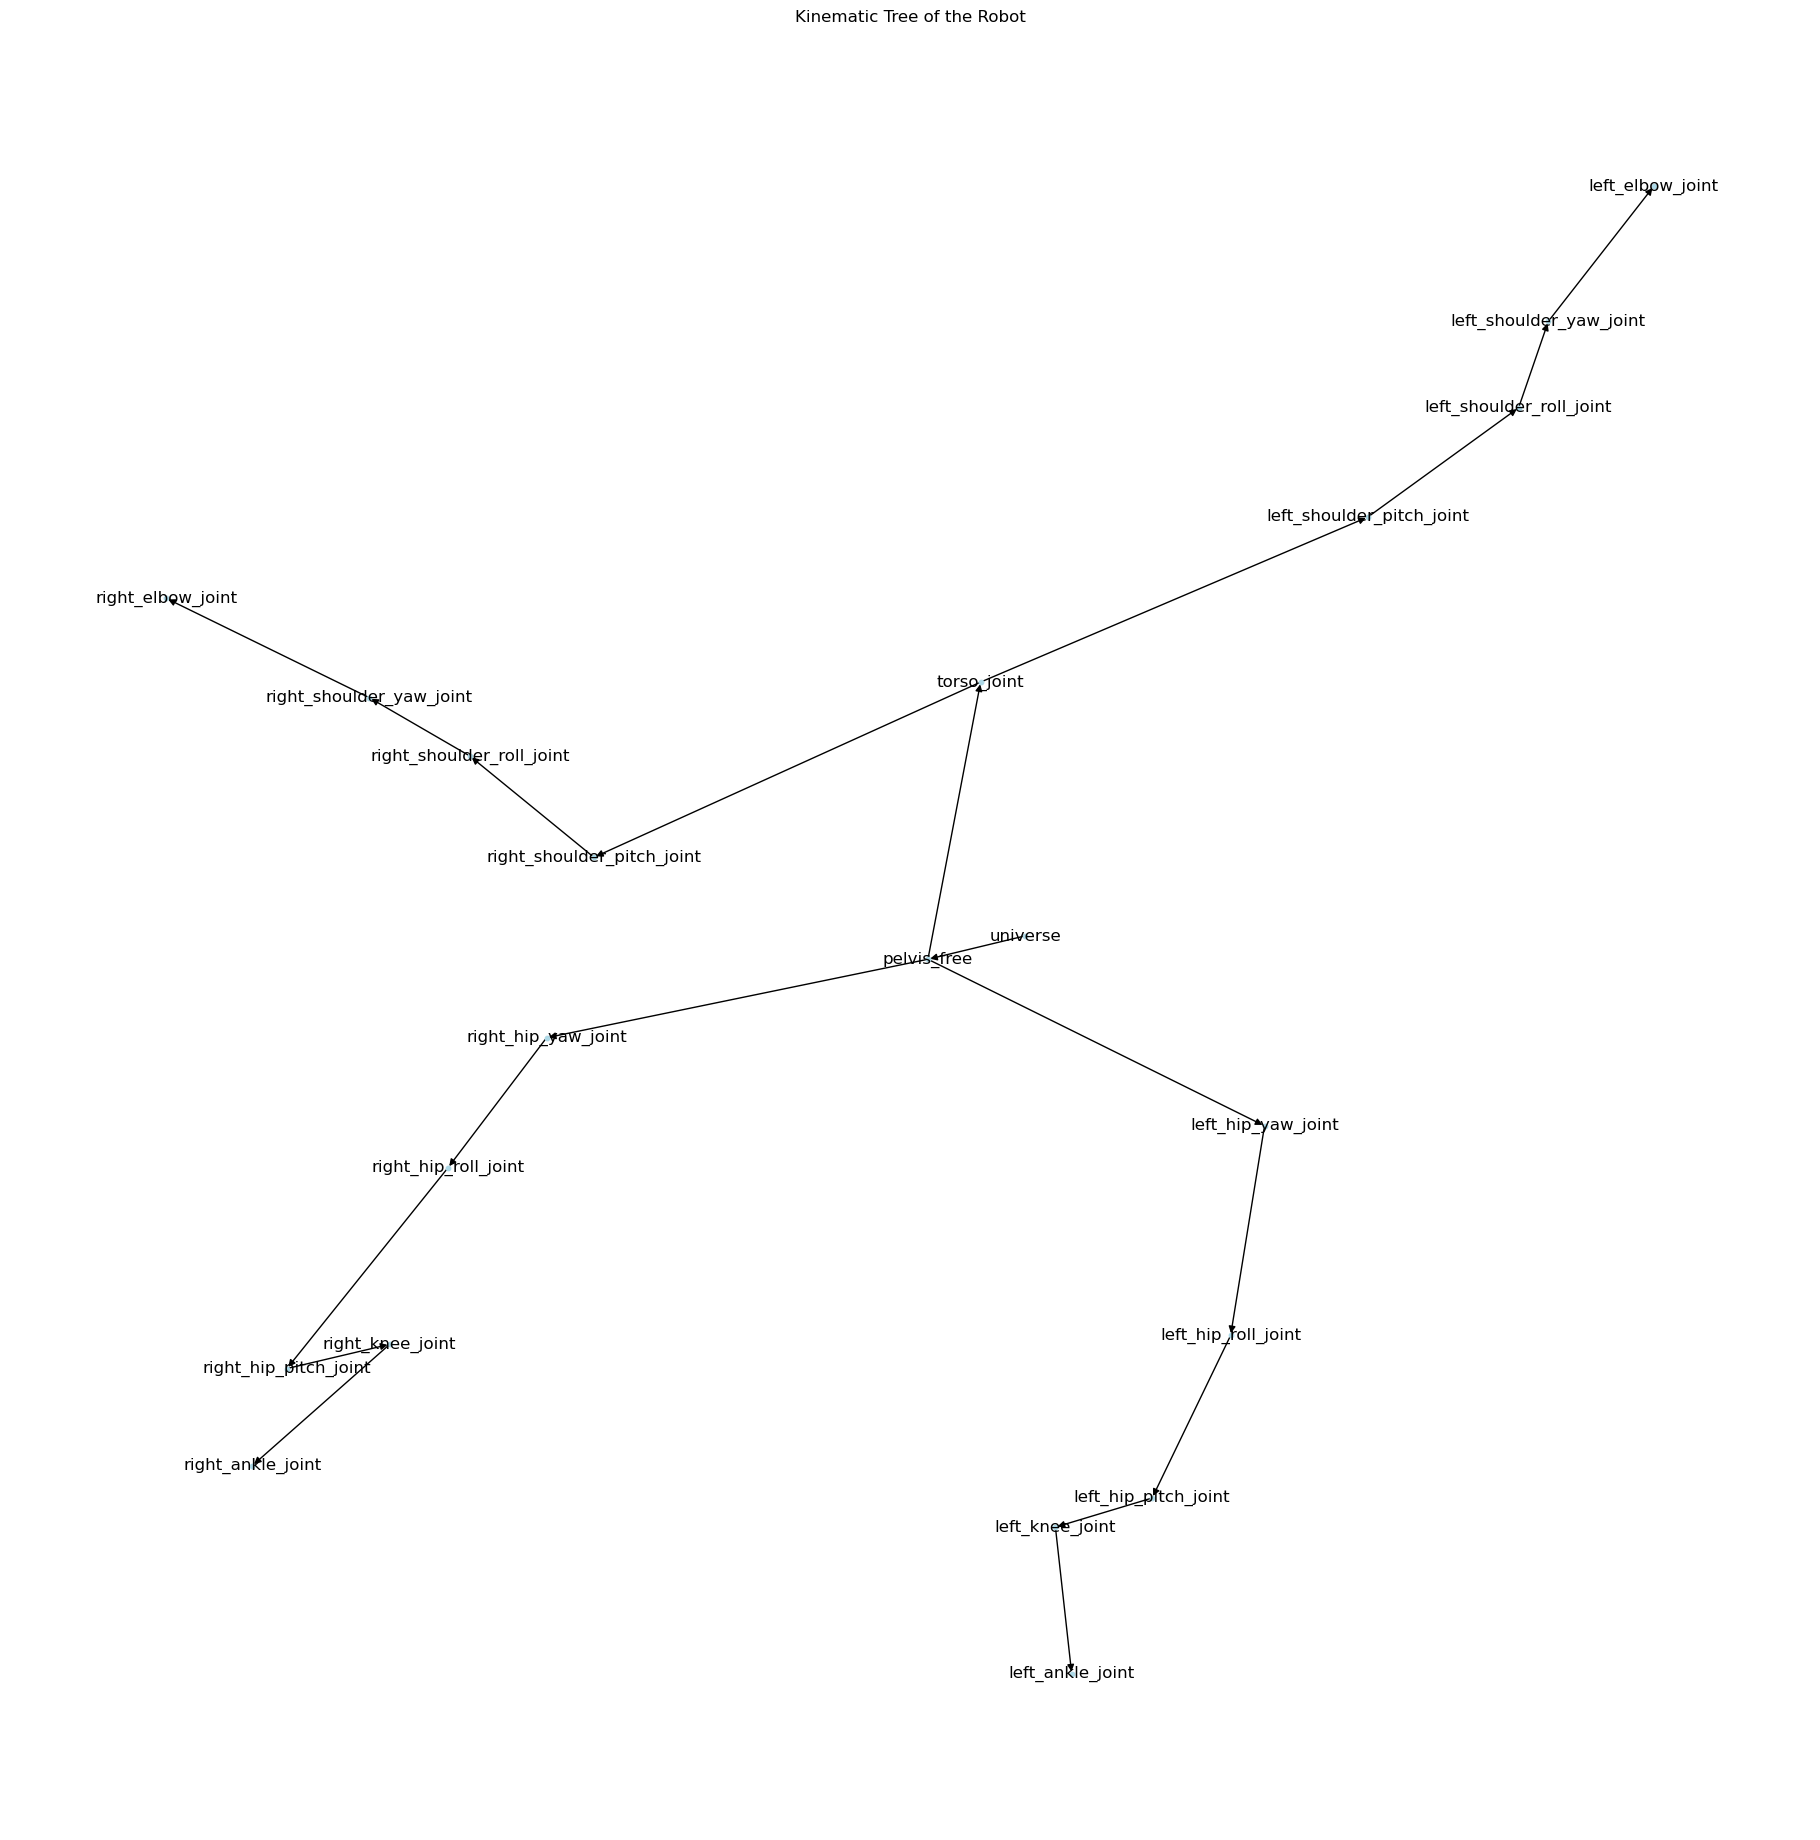

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for joint_id, joint in enumerate(model.joints[1:]):  # Skip universe
    parent = model.parents[joint.id]
    parent_name = model.names[parent]
    G.add_edge(parent_name, model.names[joint_id+1])

plt.figure(figsize=(18, 18))
nx.draw(G, with_labels=True, node_size=10, node_color='lightblue')
plt.title("Kinematic Tree of the Robot")
plt.show()

In [97]:
q = np.random.rand(model.nq)
print(q.shape)
vq = np.random.rand(model.nv)
print(vq.shape)

(26,)
(25,)


In [98]:
# M(q)
M = pin.crba(model, data, q)
print(M.shape)
h = pin.rnea(model, data, q, vq, np.zeros(25))
print(h.shape)

(25, 25)
(25,)


In [99]:
pin.centerOfMass(model, data, q, vq)

print(data.com[1]) # 
print(data.vcom[1])

[-0.05461333  0.0054899  -0.0176426 ]
[0.72947165 0.74149328 0.54293267]


In [ ]:
for name in model.names:
    print(f" {name}, {model.getJointId(name)}")
    print(data.com[model.getFrameId(name)-1])
    

 universe, 0
[ 1.5908e-01  1.4400e-04 -1.5776e-02]
 pelvis_free, 1
[0.05390777 0.46373284 1.47156193]
 left_hip_yaw_joint, 2
[-0.02464931  0.08599267 -0.13205716]
 left_hip_roll_joint, 3
[-0.03604699 -0.01653074 -0.25978063]
 left_hip_pitch_joint, 4
[ 0.048568  0.       -0.045609]
 left_knee_joint, 5
[-0.15788816 -0.0725274  -0.12646072]
 left_ankle_joint, 6
[ 0.00674759  0.00387584 -0.21616871]
 right_hip_yaw_joint, 7
[-0.02721757  0.02881113  0.2378094 ]
 right_hip_roll_joint, 8
[ 0.04435963  0.01041263 -0.26803052]
 right_hip_pitch_joint, 9
[ 1.5908e-01 -1.4400e-04 -1.5776e-02]
 right_knee_joint, 10
[ 0.05180076  0.00656367 -0.2579029 ]
 right_ankle_joint, 11
[ 1.5908e-01  1.4400e-04 -1.5776e-02]
 torso_joint, 12


IndexError: Index out of range